In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Plotting images

In [3]:
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

##Plot CONFUSION MATRIX

In [4]:
import matplotlib.pyplot as plt
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
root_dst_dir = "/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised/"


Don't execute

In [ ]:
#@title
#copying files to 'root_dst_dir'
import os, shutil

root_src_dir = "/content/drive/MyDrive/Colab Notebooks/PFA/pattern ROI/"
i=0
for src_dir, dirs, files in os.walk(root_src_dir):
    for file_ in files:
        i=i+1
        print(i)
        src_file = os.path.join(src_dir, file_)
        dst_file = os.path.join(root_dst_dir, file_)
        #print(dst_file)
        if os.path.exists(dst_file):
           # os.remove(dst_file)
            name=dst_file.split('.')[0]+'(1)'+".png"  #pour les fichiers de meme nom
            shutil.copy(src_file, name)
        else:
            shutil.copy(src_file, dst_file)

In [ ]:
#@title
#supprimer les autres fichiers corrompus et ne garder qu'une seule copie pour les doublons(fichiers de meme noms)
import os
nb=0
for (root,dirs,files) in os.walk(root_dst_dir):
    for file_ in files:
        ext=file_.split('.')[1]
        if (ext=="png"):
            nb=nb+1
        else:
            os.remove(root+file_)


print("Total number of images:",nb)

Denoising images (using OpenCV) and saving them in same directory containing original images


In [ ]:
#@title

import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

for src_dir, dirs, files in os.walk(root_dst_dir):
    for file_ in files:
      filee = plt.imread(src_dir+file_,1)
      denoised_img = cv2.fastNlMeansDenoisingColored(filee,None,20,20,7,21) 
      cv2.imwrite(src_dir+file_.split('.')[0]+'_denoised'+'.jpg',denoised_img)


**Displaying some results of denoising process**

Correction des noms des fichiers

In [ ]:
#@title

#correction des noms des fichiers 
import os
import re
nb=0
for (root,dirs,files) in os.walk(root_dst_dir):
    for file_ in files:
        turbidity = re.findall("\d+", file_)[0]
        nb=nb+1
        if (int(turbidity)>2000):
            list1 = list(turbidity)
            list1[4:7] = '_'
            
            turbidity = ''.join(list1)
            os.rename(root+'/'+file_, root+'/'+turbidity+'_'+list1[4]+".png")

print("Total files: ",nb)

Total files:  592


## Annotation du dataset

In [ ]:
#@title
import re
import os
import shutil

source=""
destination=""
sub_dir=""
#a="/content/drive/MyDrive/Colab Notebooks/PFA/Dataset/"
root_dst_dir="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised/"
for (root,dirs,files) in os.walk(root_dst_dir):

    for file_ in files:
      source=root_dst_dir+file_
      turbidity = re.findall("\d+", file_)[0] #extraire la valeur de la turbidité du nom du fichier
      #print(turbidity)
      if (int(turbidity)<150):

        sub_dir="very_Low_Turbidity/"
      elif (int(turbidity)<400):

        sub_dir="Low_Turbidity/"  
      elif (int(turbidity)<700):
        sub_dir="Medium_Turbidity/"
      else:
        sub_dir="High_Turbidity/"
       # dst_dir = src_dir.replace(root_src_dir, root_dst_dir, 1)
      if (not os.path.exists(root_dst_dir+sub_dir)):
        os.makedirs(root_dst_dir+sub_dir)            
      destination=root_dst_dir+sub_dir+file_
      #print(destination)
      shutil.move(source, destination)

###Organizing files into train, validation and test sets

In [ ]:
#@title
from Split_Dataset import SplitDataset
split_dataset = SplitDataset(dataset_dir="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised",
                                 saved_dataset_dir="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised",
                                 show_progress=True)
split_dataset.start_splitting()

In [5]:

import os
dataset_path="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised/train"
path_very_low=dataset_path+"/very_Low_Turbidity/"
path_low=dataset_path+"/Low_Turbidity/"

path_med=dataset_path+"/Medium_Turbidity/"
path_high=dataset_path+"/High_Turbidity/"

very_low_dir=os.path.join(path_very_low)
low_dir = os.path.join(path_low)

# Directory with Medium_Turbidity images
medium_dir = os.path.join(path_med)

# Directory with High_Turbidity images
high_dir = os.path.join(path_high)

##**for training dataset**

In [6]:
import os
train_vlow_turb = os.listdir(very_low_dir)
print(train_vlow_turb[:5])

train_low_turb = os.listdir(low_dir)
print(train_low_turb[:5])

train_medium_turb = os.listdir(medium_dir)
print(train_medium_turb[:5])

train_high_turb = os.listdir(high_dir)
print(train_high_turb[:5])

['140_1.png', '140_2.png', '140.png', '140a.png', '140aa.png']
['380_1.png', '380_2.png', '380_1(1).png', '310.png', '310(1).png']
['630_2.png', '630_3.png', '600_1.png', '600_2.png', '600_3.png']
['720_2.png', '720_2(1).png', '780_1.png', '780_2.png', '780_2(1).png']


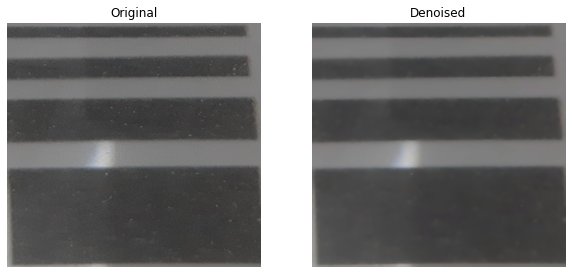

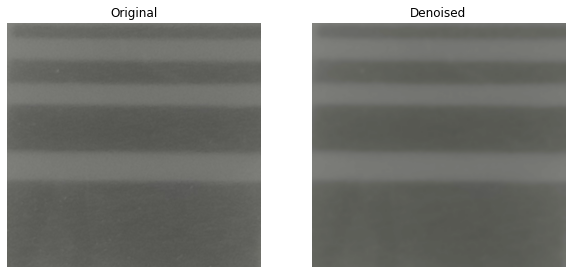

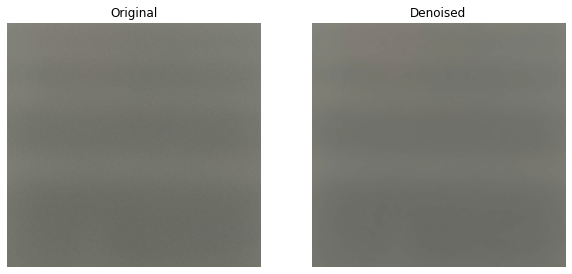

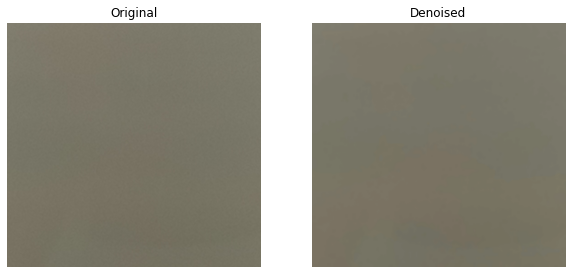

In [ ]:
#@title
import numpy as np 

import cv2 

from matplotlib import pyplot as plt 

class1 = plt.imread(path_very_low+train_vlow_turb[4],1)
class2 = plt.imread(path_low+train_low_turb[3],1)
class3 = plt.imread(path_med+train_medium_turb[4],1)
class4 = plt.imread(path_high+train_high_turb[9],1)

noiseless_image_colored=[0,0,0,0]
noiseless_image_colored[0] = cv2.fastNlMeansDenoisingColored(class1,None,20,20,7,21) 
noiseless_image_colored[1] = cv2.fastNlMeansDenoisingColored(class2,None,20,20,7,21) 
noiseless_image_colored[2] = cv2.fastNlMeansDenoisingColored(class3,None,20,20,7,21) 
noiseless_image_colored[3] = cv2.fastNlMeansDenoisingColored(class4,None,20,20,7,21) 

plot_comparison(class1, noiseless_image_colored[0], "Denoised")
plot_comparison(class2, noiseless_image_colored[1], "Denoised")
plot_comparison(class3, noiseless_image_colored[2], "Denoised")
plot_comparison(class4, noiseless_image_colored[3], "Denoised")


In [7]:
vld=len(os.listdir(very_low_dir))
ld=len(os.listdir(low_dir))
md=len(os.listdir(medium_dir))
hd=len(os.listdir(high_dir))
print('total very_Low_Turbidity images:', vld)
print('total Low_Turbidity images:', ld)
print('total Medium_Turbidity images:', md)
print('total High_Turbidity images:', hd)


total very_Low_Turbidity images: 75
total Low_Turbidity images: 77
total Medium_Turbidity images: 85
total High_Turbidity images: 125


Histogramme de la répartition des données d'apprentissage en fonction des 4 classes

<BarContainer object of 4 artists>

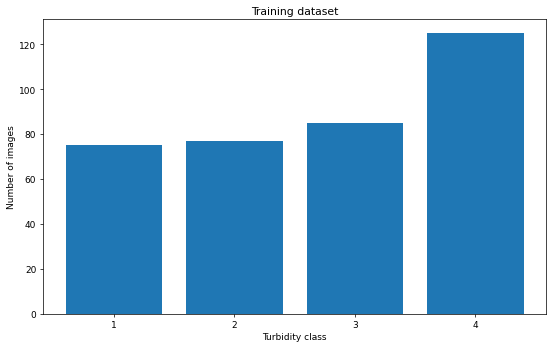

In [ ]:
import matplotlib.pyplot as plt

nb_imgs=[ vld, ld, md, hd]
bins = [ '1', '2', '3', '4']
plt.figure(figsize=(10, 6),dpi=65)
plt.ylabel('Number of images')
plt.xlabel('Turbidity class')
plt.title('Training dataset')
plt.bar( bins , nb_imgs)



##Building the ImageDataGenerator object


In [8]:
batch_size = 20

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised/train"
valid_path="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised/valid"
testing_dir="/content/drive/MyDrive/Colab Notebooks/PFA/original_denoised/test"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
testing_datagen = ImageDataGenerator(rescale=1. / 255)

   # validation_split=0.25)  # set validation split

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(400,400 ),  # All images will be resized to 300 x 300
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['very_Low_Turbidity','Low_Turbidity','Medium_Turbidity','High_Turbidity'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical', shuffle=True,
        #subset='training'
        )



validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    #dataset_path, # same directory as training data
    target_size=(400,400),
    batch_size=batch_size,
    classes = ['very_Low_Turbidity','Low_Turbidity','Medium_Turbidity','High_Turbidity'],
    class_mode='categorical', shuffle=True ,
   # subset='validation'
   ) # set as validation data


testing_datagen = ImageDataGenerator(rescale=1. / 255)
testing_generator = testing_datagen.flow_from_directory(
testing_dir,
classes = ['very_Low_Turbidity','Low_Turbidity','Medium_Turbidity','High_Turbidity'],
target_size=(400, 400),
batch_size=batch_size,
shuffle=False)

Found 362 images belonging to 4 classes.
Found 81 images belonging to 4 classes.
Found 76 images belonging to 4 classes.


In [9]:
total_sample=train_generator.n
total_sample

362

#On essaie 5 modèles différents

##ex_nihilo MODEL


In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers

kernel_init='he_normal'
model = tf.keras.models.Sequential([

    # The first convolution
    Conv2D(16, (3,3), activation='relu', input_shape=(400,400 , 3),kernel_initializer = kernel_init),
    BatchNormalization(),
    
    AveragePooling2D(2, 2),

    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    AveragePooling2D(2,2),

    
    # The third convolution
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    AveragePooling2D(2,2),
    # The fourth convolution
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    AveragePooling2D(2, 2),
    #MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    #`AveragePooling2D(2, 2),


    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    GaussianDropout(0.4),

    # 128 neuron in the fully-connected layer WITH regularizers to minimize overfitting
    Dense(64, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2),
                                                 # activity_regularizer=regularizers.L2(1e-3)
                                                 ),
                                    
    Dense(16, activation='relu',kernel_regularizer=regularizers.L2(1e-2),
                                                  bias_regularizer=regularizers.L2(1e-3),
                                                 # activity_regularizer=regularizers.L2(1e-3)
                                                  ),
    Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer="adagrad",
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 398, 398, 16)     64        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 199, 199, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 197, 197, 32)     128       
 hNormalization)                                                 
                                                        

In [12]:
#fit

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping


#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)


n_epochs=120
#PLOTTING ARCHITECTURE OF THE MODEL IN DRIVE
plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/1.png",
     show_shapes=True)

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/weights.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


##FITING 
history = model.fit_generator(train_generator, epochs=n_epochs,
                              
                              shuffle=True,
                              validation_data = validation_generator, 
                              verbose = 1,
                              callbacks=[cp_callback,early_stop])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/120
19/19 [==============================] - ETA: 0s - loss: 1.1625 - acc: 0.6906
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/weights.ckpt
19/19 [==============================] - 98s 5s/step - loss: 1.1625 - acc: 0.6906 - val_loss: 1.7668 - val_acc: 0.1605
Epoch 2/120
19/19 [==============================] - ETA: 0s - loss: 1.0711 - acc: 0.7403
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/weights.ckpt
19/19 [==============================] - 7s 356ms/step - loss: 1.0711 - acc: 0.7403 - val_loss: 1.7345 - val_acc: 0.2346
Epoch 3/120
19/19 [==============================] - ETA: 0s - loss: 0.8313 - acc: 0.8398
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/weights.ckpt
19/19 [==============================] - 7s 357ms/step - loss: 0.8313 - acc: 0.8398 - val_loss: 1.7680 - val_acc: 0.2346
Epoch 4/120
19/19 

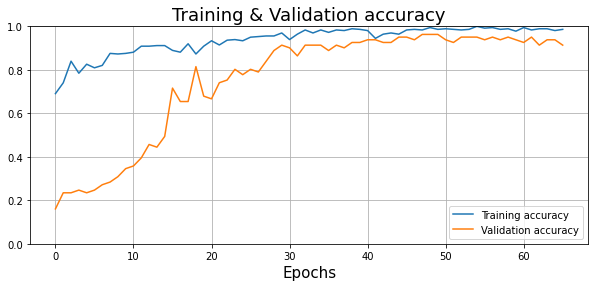

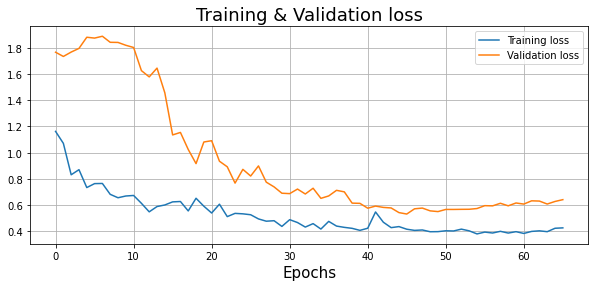

In [13]:
#title
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/1.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/other_arch/55.png")
plt.show()


In [14]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 97.37%
[INFO] Loss:  0.46345749497413635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
Classification Report
                    precision    recall  f1-score   support

very_Low_Turbidity       1.00      0.94      0.97        16
     Low_Turbidity       0.94      0.94      0.94        16
  Medium_Turbidity       0.95      1.00      0.97        18
    High_Turbidity       1.00      1.00      1.00        26

          accuracy                           0.97        76
         macro avg       0.97      0.97      0.97        76
      weighted avg       0.97      0.97      0.97        76



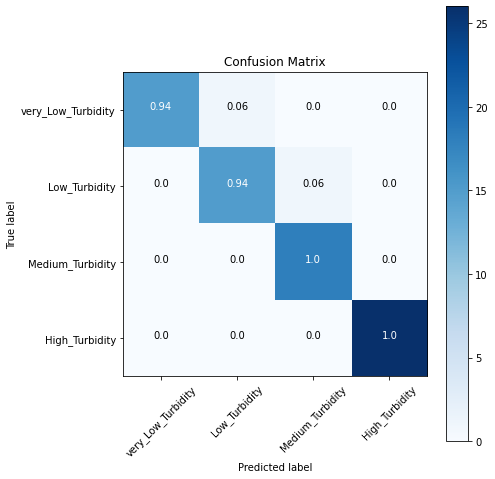

In [15]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))

#new dataset

In [16]:
testing_dir="/content/drive/MyDrive/Colab Notebooks/PFA/DATASET(test)"
testing_datagen = ImageDataGenerator(rescale=1. / 255)
testing_generator = testing_datagen.flow_from_directory(
testing_dir,
classes = ['very_Low_Turbidity','Low_Turbidity','Medium_Turbidity','High_Turbidity'],
target_size=(400, 400),
batch_size=batch_size,
shuffle=False)

Found 50 images belonging to 4 classes.


In [17]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 38.00%
[INFO] Loss:  2.4972546100616455


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
Classification Report


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


ValueError: ignored

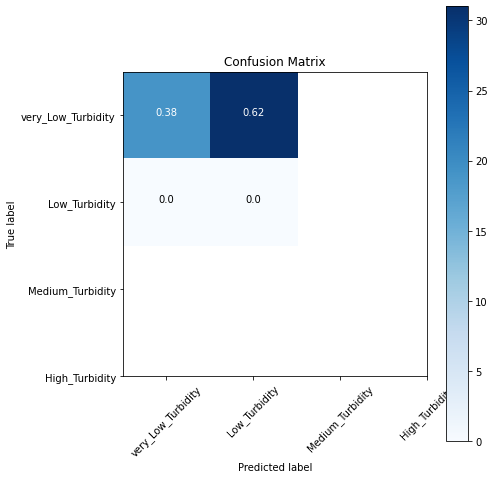

In [18]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))

#Resnet18

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import *
from keras import regularizers

class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
       

        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(32, (3,3), strides=2,
                             padding="valid", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = AveragePooling2D (pool_size=(2, 2), strides=2, padding="valid")
        self.res_1_1 = ResnetBlock(32)
        self.res_1_2 = ResnetBlock(32)
        self.res_2_1 = ResnetBlock(64, down_sample=True)
        self.res_2_2 = ResnetBlock(64)
        self.res_3_1 = ResnetBlock(128, down_sample=True)
        self.res_3_2 = ResnetBlock(128)
        #self.res_4_1 = ResnetBlock(256, down_sample=True)
        #self.res_4_2 = ResnetBlock(256)
        self.avg_pool = AveragePooling2D(2,2)
        self.flat = Flatten()
        self.drop5=GaussianDropout(0.5)
        self.fc1 = Dense(64, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2))
        self.fc2 = Dense(32, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2))

        self.drop2=GaussianDropout(0.3)
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2,self.drop2, self.res_3_1, self.res_3_2
                        #  , self.res_4_1, self.res_4_2
                          ]:


                          out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)        
        out = self.drop5(out)
        out = self.fc1(out)        
        out = self.fc2(out)
        #out = self.drop2(out)
        out = self.fc(out)
        return out


In [ ]:
model = ResNet18(4)
model.build(input_shape = (None,400,400,3))
#use categorical_crossentropy since the label is one-hot encoded
from tensorflow.keras.optimizers import SGD,Adam
#opt = SGD(learning_rate=0.01,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model.compile(optimizer = 'adagrad',loss='categorical_crossentropy', metrics=["acc"]) 
model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          multiple                  896       
                                                                 
 batch_normalization_19 (Bat  multiple                 128       
 chNormalization)                                                
                                                                 
 average_pooling2d_5 (Averag  multiple                 0         
 ePooling2D)                                                     
                                                                 
 resnet_block_6 (ResnetBlock  multiple       

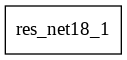

In [ ]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
#I did not use cross validation, so the validate performance is not accurate.
n_epochs=110
#PLOTTING ARCHITECTURE OF THE MODEL IN DRIVE
plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/3_.png",
     show_shapes=True)

In [ ]:
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/110
19/19 [==============================] - 104s 5s/step - loss: 1.4049 - acc: 0.4448 - val_loss: 2.9259 - val_acc: 0.2099
Epoch 2/110
19/19 [==============================] - 102s 5s/step - loss: 1.0477 - acc: 0.6243 - val_loss: 2.0915 - val_acc: 0.2099
Epoch 3/110
19/19 [==============================] - 98s 5s/step - loss: 0.9428 - acc: 0.6740 - val_loss: 1.6338 - val_acc: 0.2593
Epoch 4/110
19/19 [==============================] - 98s 5s/step - loss: 0.8426 - acc: 0.6934 - val_loss: 1.7111 - val_acc: 0.3457
Epoch 5/110
19/19 [==============================] - 95s 5s/step - loss: 0.7552 - acc: 0.7597 - val_loss: 1.7486 - val_acc: 0.3457
Epoch 6/110
19/19 [==============================] - 95s 5s/step - loss: 0.7472 - acc: 0.7790 - val_loss: 1.7443 - val_acc: 0.3457
Epoch 7/110
19/19 [==============================] - 96s 5s/step - loss: 0.7282 - acc: 0.7707 - val_loss: 1.7107 - val_acc: 0.3457
Epoch 8/110
19/19 [==============================] - 96s 5s/step - loss: 0.6679 -

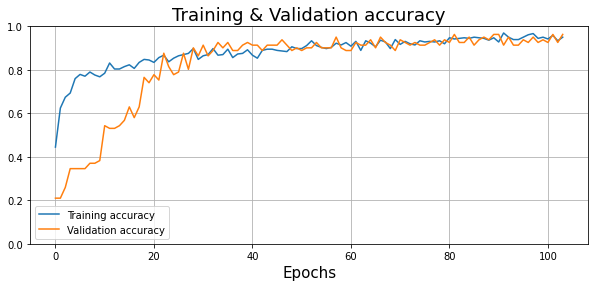

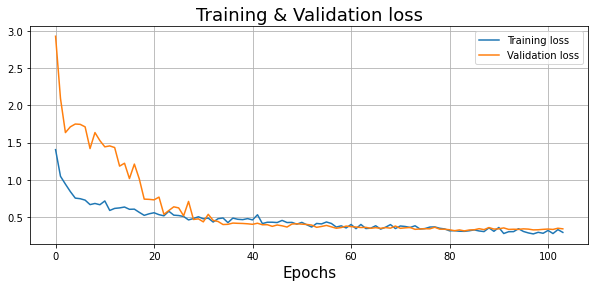

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/3.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/33.png")
plt.show()

In [ ]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 90.79%
[INFO] Loss:  0.41337838768959045


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
Classification Report
                    precision    recall  f1-score   support

very_Low_Turbidity       1.00      0.81      0.90        16
     Low_Turbidity       0.83      0.94      0.88        16
  Medium_Turbidity       0.89      0.89      0.89        18
    High_Turbidity       0.93      0.96      0.94        26

          accuracy                           0.91        76
         macro avg       0.91      0.90      0.90        76
      weighted avg       0.91      0.91      0.91        76



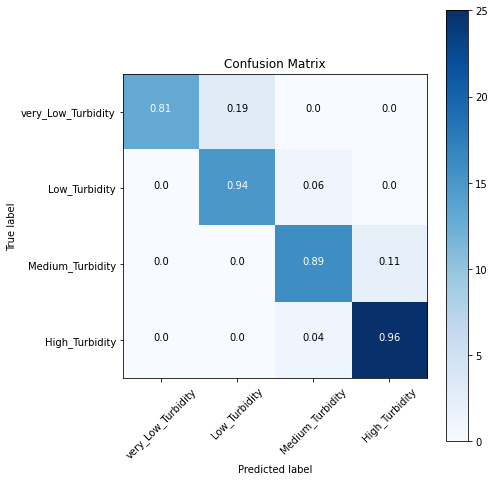

In [ ]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))

#**Resnet transfer Learning(full)**



In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
#from classification_models.resnet import ResNet18, preprocess_input

import shutil, os
import cv2

In [ ]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
#from tensorflow.keras.applications.resnet18 import ResNet18

n_classes=4
# build model

base_model =tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(400,400,3),
    pooling="avg",
    classes=4,
    classifier_activation="softmax",
)
for layer in base_model.layers:
  layer.trainable = False

x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)

output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])
model.summary()

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
# training
model.compile(optimizer = 'adagrad',loss='categorical_crossentropy', metrics=["acc"]) 


94683136/94668760 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                             

In [ ]:
n_epochs=90
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/90
19/19 [==============================] - 87s 4s/step - loss: 1.1245 - acc: 0.5331 - val_loss: 0.9598 - val_acc: 0.6420
Epoch 2/90
19/19 [==============================] - 8s 413ms/step - loss: 0.9014 - acc: 0.6575 - val_loss: 0.8188 - val_acc: 0.7160
Epoch 3/90
19/19 [==============================] - 8s 437ms/step - loss: 0.7946 - acc: 0.7210 - val_loss: 0.7376 - val_acc: 0.7160
Epoch 4/90
19/19 [==============================] - 8s 417ms/step - loss: 0.7306 - acc: 0.7514 - val_loss: 0.6838 - val_acc: 0.7531
Epoch 5/90
19/19 [==============================] - 8s 416ms/step - loss: 0.6844 - acc: 0.7762 - val_loss: 0.6419 - val_acc: 0.7531
Epoch 6/90
19/19 [==============================] - 8s 408ms/step - loss: 0.6508 - acc: 0.7652 - val_loss: 0.6069 - val_acc: 0.7778
Epoch 7/90
19/19 [==============================] - 8s 415ms/step - loss: 0.6236 - acc: 0.7818 - val_loss: 0.5809 - val_acc: 0.7901
Epoch 8/90
19/19 [==============================] - 8s 410ms/step - loss: 0.60

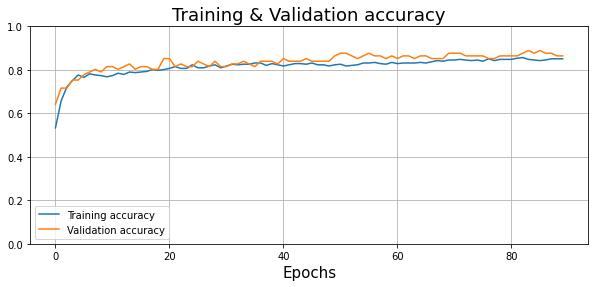

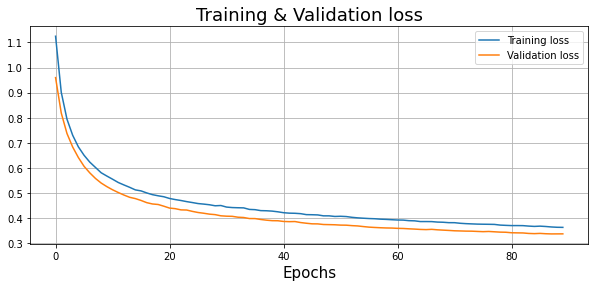

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/transfer learning.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/transfer learning1.png")
plt.show()

In [ ]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 77.03%
[INFO] Loss:  0.4646580219268799


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
Classification Report
                    precision    recall  f1-score   support

very_Low_Turbidity       0.92      0.79      0.85        14
     Low_Turbidity       0.57      0.75      0.65        16
  Medium_Turbidity       0.67      0.56      0.61        18
    High_Turbidity       0.92      0.92      0.92        26

          accuracy                           0.77        74
         macro avg       0.77      0.75      0.76        74
      weighted avg       0.78      0.77      0.77        74



array([[11,  3,  0,  0],
       [ 1, 12,  3,  0],
       [ 0,  6, 10,  2],
       [ 0,  0,  2, 24]])

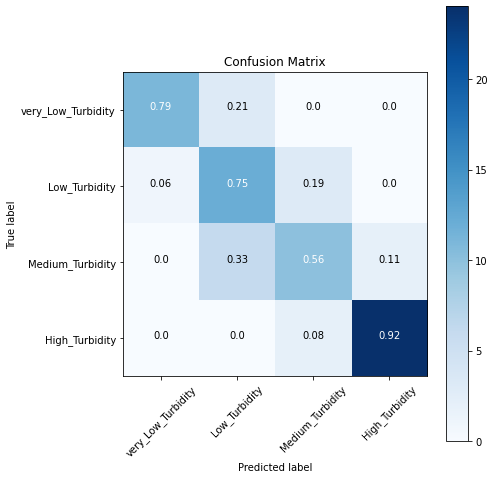

In [ ]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))
cm

#**Resnet transfer Learning(initialization)**



In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
#from classification_models.resnet import ResNet18, preprocess_input

import shutil, os
import cv2

In [ ]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
#from tensorflow.keras.applications.resnet18 import ResNet18

n_classes=4
# build model

base_model =tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(400,400,3),
    pooling=None,
    classes=4,
    classifier_activation="softmax",
)
for layer in base_model.layers:
  layer.trainable = True

x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2),
                                                 # activity_regularizer=regularizers.L2(1e-3)
                                                 )(x)
x = Dense(32, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2),
                                                 # activity_regularizer=regularizers.L2(1e-3)
                                                 )(x)

output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])
model.summary()

early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
# training
model.compile(optimizer = 'adam',loss='categorical_crossentropy', metrics=["acc"]) 


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 406, 406, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 200, 200, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
n_epochs=90
history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/90
19/19 [==============================] - 7s 387ms/step - loss: 0.3319 - acc: 0.9392 - val_loss: 0.3319 - val_acc: 0.9506
Epoch 2/90
19/19 [==============================] - 7s 373ms/step - loss: 0.3321 - acc: 0.9309 - val_loss: 0.3831 - val_acc: 0.9506
Epoch 3/90
19/19 [==============================] - 7s 373ms/step - loss: 0.3523 - acc: 0.9227 - val_loss: 0.6273 - val_acc: 0.8889
Epoch 4/90
19/19 [==============================] - 8s 398ms/step - loss: 0.4097 - acc: 0.9088 - val_loss: 0.4188 - val_acc: 0.9259
Epoch 5/90
19/19 [==============================] - 7s 375ms/step - loss: 0.3171 - acc: 0.9530 - val_loss: 0.3738 - val_acc: 0.9506
Epoch 6/90
19/19 [==============================] - 8s 397ms/step - loss: 0.3405 - acc: 0.9392 - val_loss: 0.3846 - val_acc: 0.9506
Epoch 7/90
19/19 [==============================] - 7s 373ms/step - loss: 0.3506 - acc: 0.9503 - val_loss: 0.3824 - val_acc: 0.9506
Epoch 8/90
19/19 [==============================] - 7s 376ms/step - loss: 0.

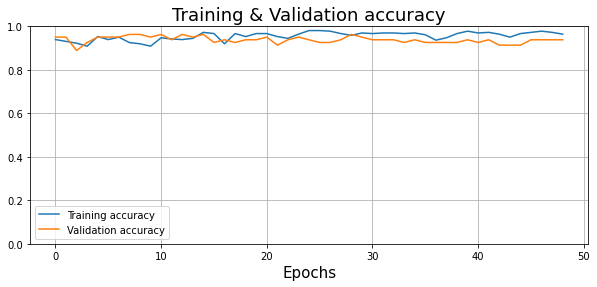

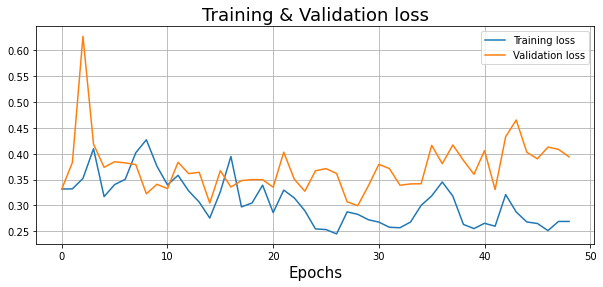

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/transfer learning.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/resnet/transfer learning1.png")
plt.show()

In [ ]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 92.11%
[INFO] Loss:  0.46558138728141785


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
Classification Report
                    precision    recall  f1-score   support

very_Low_Turbidity       1.00      0.88      0.93        16
     Low_Turbidity       0.83      0.94      0.88        16
  Medium_Turbidity       0.85      0.94      0.89        18
    High_Turbidity       1.00      0.92      0.96        26

          accuracy                           0.92        76
         macro avg       0.92      0.92      0.92        76
      weighted avg       0.93      0.92      0.92        76



array([[14,  2,  0,  0],
       [ 0, 15,  1,  0],
       [ 0,  1, 17,  0],
       [ 0,  0,  2, 24]])

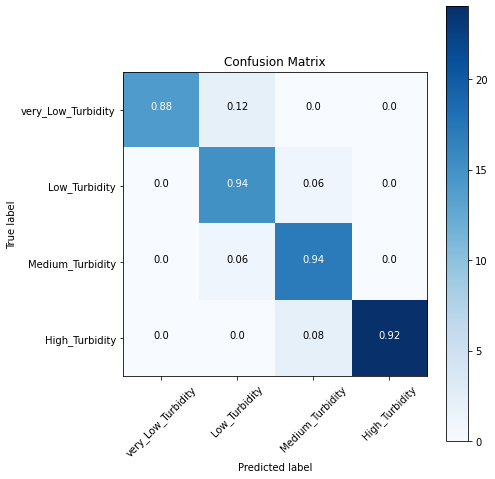

In [ ]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))
cm

#**Aquasight_Modifié Architecture**

last update: adding batch normalization after all conv layers

In [ ]:
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend 

from keras import regularizers

import tensorflow as tf

def Aquasight_mod(input_size = (400,400,3)):
    #size_filter_in = 16
    #kernel_init = 'glorot_uniform'
    kernel_init = 'he_normal'
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3,3), activation = 'relu', padding = 'valid')(inputs)
    batch_norm=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(batch_norm)
    #pool1 = GlobalAveragePooling2D()(batch_norm)

    conv2 = Conv2D(64, (3,3), activation = 'relu', padding = 'valid')(pool1)
    batch_norm=BatchNormalization()(conv2)
    #drop=tf.keras.layers.Dropout(0.2)(batch_norm)
    pool2 = MaxPooling2D(pool_size=(2, 2))(batch_norm)


    conv3 = Conv2D(128, (3,3), activation = 'relu', padding = 'valid')(pool2)
    batch_norm=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2,2))(batch_norm)

    #conv4 = Conv2D(128, (3,3), activation = 'relu', padding = 'valid', kernel_initializer = kernel_init)(pool3)
    #batch_norm=BatchNormalization()(conv4)
    #pool4 = GlobalAveragePooling2D()(batch_norm)

    #pool4 = AveragePooling2D(pool_size=(2,2))(conv4)


    x=GaussianDropout(0.5)(pool3)
    # Flatten the results to feed into a dense layer    

    x=tf.keras.layers.Flatten()(x)

    x=Dense(64, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2))(x)
    x=GaussianDropout(0.2)(x)

    x=Dense(32, activation='relu',kernel_regularizer=regularizers.L2( 1e-3),
                                                  bias_regularizer=regularizers.L2(1e-2))(x)
    
    x=Dense(4, activation='softmax')(x)


    model = Model(inputs,x)

    model.compile(optimizer = 'adagrad', loss = 'categorical_crossentropy', metrics = ['acc'])
    
    model.summary()


    return model

In [ ]:

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
 

#training
#Early stopping to avoid overfitting of model
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)


n_epochs=100
model=Aquasight_mod()

plot_model (model, to_file="/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/aquasight_modif/2_.png",
     show_shapes=True)

history = model.fit_generator(train_generator, epochs=n_epochs,
                              callbacks=[early_stop],
                              shuffle=True,
                              validation_data = validation_generator, 
                              verbose = 1)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 398, 398, 32)      896       
                                                                 
 batch_normalization_26 (Bat  (None, 398, 398, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 199, 199, 32)     0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 197, 197, 64)      18496     
                                                                 
 batch_normalization_27 (Bat  (None, 197, 197, 64)     256 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
19/19 [==============================] - 9s 427ms/step - loss: 2.8757 - acc: 0.5856 - val_loss: 1.6504 - val_acc: 0.2099
Epoch 2/100
19/19 [==============================] - 8s 394ms/step - loss: 0.9871 - acc: 0.7210 - val_loss: 1.8891 - val_acc: 0.2099
Epoch 3/100
19/19 [==============================] - 8s 396ms/step - loss: 0.8669 - acc: 0.7735 - val_loss: 2.1532 - val_acc: 0.2346
Epoch 4/100
19/19 [==============================] - 8s 395ms/step - loss: 0.8782 - acc: 0.7762 - val_loss: 2.6427 - val_acc: 0.2346
Epoch 5/100
19/19 [==============================] - 9s 450ms/step - loss: 0.7603 - acc: 0.7569 - val_loss: 2.9571 - val_acc: 0.2346
Epoch 6/100
19/19 [==============================] - 8s 393ms/step - loss: 0.7988 - acc: 0.7707 - val_loss: 2.7263 - val_acc: 0.2346
Epoch 7/100
19/19 [==============================] - 8s 395ms/step - loss: 0.7016 - acc: 0.7845 - val_loss: 3.1537 - val_acc: 0.2346
Epoch 8/100
19/19 [==============================] - 7s 389ms/step - 

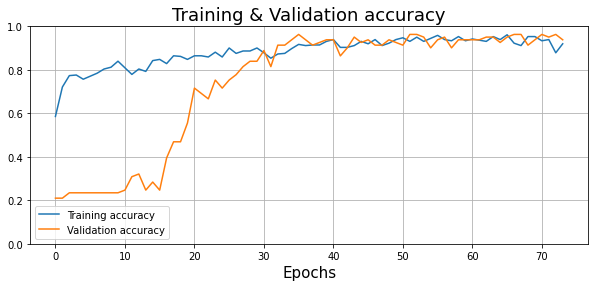

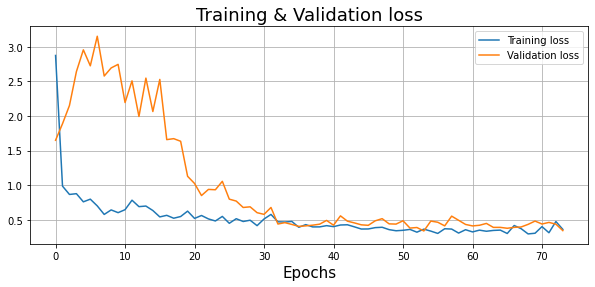

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(len(acc))
plt.figure(figsize=(10 ,4))
plt.grid(True)
ymin, ymax = plt.ylim()

plt.ylim(ymin * 3, ymax)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training & Validation accuracy',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/aquasight_modif/2.png")

plt.show()


# Plot loss results
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(10,4))
plt.grid(True)

plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training & Validation loss',fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.legend(loc=0)
#plt.figure()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/PFA/RESULTS_DENOISED_DATASET/aquasight_modif/22.png")
plt.show()

In [ ]:
test_score = model.evaluate_generator(testing_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 88.16%
[INFO] Loss:  0.5083411335945129


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


Confusion Matrix
Normalized confusion matrix
Classification Report
                    precision    recall  f1-score   support

very_Low_Turbidity       1.00      0.88      0.93        16
     Low_Turbidity       0.83      0.94      0.88        16
  Medium_Turbidity       0.76      0.89      0.82        18
    High_Turbidity       0.96      0.85      0.90        26

          accuracy                           0.88        76
         macro avg       0.89      0.89      0.88        76
      weighted avg       0.89      0.88      0.88        76



array([[14,  2,  0,  0],
       [ 0, 15,  1,  0],
       [ 0,  1, 16,  1],
       [ 0,  0,  4, 22]])

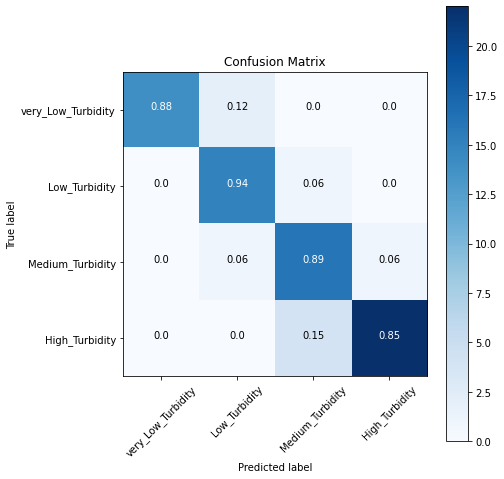

In [ ]:
import numpy as np

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))
cm


*   3 images sur 74 sont mal classées
